# Generate Rotation Data

## Load patients' ROI data

In [17]:
ROI_CT_path = '../Resources/ROI_CT.xlsx'
ROI_MR_path = '../Resources/ROI_MR.xlsx'

In [18]:
import pandas as pd

roi_CT = pd.read_excel(ROI_CT_path, index_col=[0, 1], header=[0, 1])

print(roi_CT)


              Bridget           Chris           Jean-Marc           Median  \
                    X    Y    Z     X    Y    Z         X    Y    Z      X   
AH LLSCC ant      758  449  207   758  449  207       757  448  207    758   
   LLSCC post     751  478  205   751  478  205       751  479  207    751   
   RLSCC ant      243  475  214   243  475  214       243  473  214    243   
   RLSCC post     256  502  208   256  502  208       256  501  209    256   
AZ LLSCC ant      797  524  247   797  524  247       795  524  246    797   
...               ...  ...  ...   ...  ...  ...       ...  ...  ...    ...   
PH RLSCC post     235  512  216   235  512  216       236  511  217    235   
SM LLSCC ant      771  564  209   771  564  209       769  562  210    771   
   LLSCC post     754  584  199   754  584  199       753  582  199    754   
   RLSCC ant      233  524  256   233  524  256       235  523  255    233   
   RLSCC post     248  544  239   248  544  239       248  544  

In [183]:
roi_CT_AH = roi_CT.loc['AH']
print(roi_CT_AH)

roi_CT_AH_Median = roi_CT_AH.Median

print(roi_CT_AH_Median.values)
tmp = roi_CT_AH_Median.values
print(tmp)

           Bridget           Chris           Jean-Marc           Median  ...  \
                 X    Y    Z     X    Y    Z         X    Y    Z      X  ...   
LLSCC ant      758  449  207   758  449  207       757  448  207    758  ...   
LLSCC post     751  478  205   751  478  205       751  479  207    751  ...   
RLSCC ant      243  475  214   243  475  214       243  473  214    243  ...   
RLSCC post     256  502  208   256  502  208       256  501  209    256  ...   

                Bridget-Diff       Chris-Diff       JM-Diff        
              Z            X  Y  Z          X  Y  Z       X  Y  Z  
LLSCC ant   207            0  0  0          0  0  0       1  1  0  
LLSCC post  205            0  0  0          0  0  0       0 -1 -2  
RLSCC ant   214            0  0  0          0  0  0       0  2  0  
RLSCC post  208            0  0  0          0  0  0       0  1 -1  

[4 rows x 21 columns]
[[758 449 207]
 [751 478 205]
 [243 475 214]
 [256 502 208]]
[[758 449 207]
 [751 478 20

## Load patients' DICOM data: CT/MR

In [20]:
dicom_AH_CT_path = '/Volumes/ExternalDis/PhD/Project/Date/CT_MRI_Pre_Post_A/AH Pre'

print(dicom_AH_CT_path)

/Volumes/ExternalDis/PhD/Project/Date/CT_MRI_Pre_Post_A/AH Pre


### Present ROI and DICOM

In [21]:
import pydicom as dicom
import os
import numpy

In [22]:
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(dicom_AH_CT_path):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

print(lstFilesDCM)

['/Volumes/ExternalDis/PhD/Project/Date/CT_MRI_Pre_Post_A/AH Pre/ser011img00000.dcm', '/Volumes/ExternalDis/PhD/Project/Date/CT_MRI_Pre_Post_A/AH Pre/ser011img00001.dcm', '/Volumes/ExternalDis/PhD/Project/Date/CT_MRI_Pre_Post_A/AH Pre/ser011img00002.dcm', '/Volumes/ExternalDis/PhD/Project/Date/CT_MRI_Pre_Post_A/AH Pre/ser011img00003.dcm', '/Volumes/ExternalDis/PhD/Project/Date/CT_MRI_Pre_Post_A/AH Pre/ser011img00004.dcm', '/Volumes/ExternalDis/PhD/Project/Date/CT_MRI_Pre_Post_A/AH Pre/ser011img00005.dcm', '/Volumes/ExternalDis/PhD/Project/Date/CT_MRI_Pre_Post_A/AH Pre/ser011img00006.dcm', '/Volumes/ExternalDis/PhD/Project/Date/CT_MRI_Pre_Post_A/AH Pre/ser011img00007.dcm', '/Volumes/ExternalDis/PhD/Project/Date/CT_MRI_Pre_Post_A/AH Pre/ser011img00008.dcm', '/Volumes/ExternalDis/PhD/Project/Date/CT_MRI_Pre_Post_A/AH Pre/ser011img00009.dcm', '/Volumes/ExternalDis/PhD/Project/Date/CT_MRI_Pre_Post_A/AH Pre/ser011img00010.dcm', '/Volumes/ExternalDis/PhD/Project/Date/CT_MRI_Pre_Post_A/AH Pre/

In [23]:
# Get ref file
RefDs = dicom.read_file(lstFilesDCM[0])
print(RefDs)
print("####################################")

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))
print(ConstPixelDims)
print("####################################")

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))
print(ConstPixelSpacing)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 78
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Big Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113619.6.201
(0002, 0013) Implementation Version Name         SH: 'CENTRICITY_3.0'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20191115'
(0008, 0013) Instance Creation Time              TM: '121000'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.76.380.18.15.1180824113221050.3530.92.1
(0008, 0020) Study Date                          DA: '20191115'
(0008, 0021) Series Date                         DA: '20191115'
(0008, 0022) Acquisition Date                    DA: 

In [ ]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

print(ArrayDicom.shape)

In [239]:
from matplotlib import pyplot
from matplotlib.patches import Circle

def show_pts(volume, pts, pixel_space):
    y_row = numpy.arange(0.0, volume.shape[0]*pixel_space[0], pixel_space[0])
    x_column = numpy.arange(0.0, volume.shape[1]*pixel_space[1], pixel_space[1])
    z_slice = numpy.arange(0.0, volume.shape[2]*pixel_space[2], pixel_space[2])

    fig, axs = pyplot.subplots(2,2,sharex=True)
    fig.set_dpi(300)

    axs[0][0].set_title("LLSCC ant")
    axs[0][0].set_aspect('equal', 'datalim')
    axs[0][0].pcolormesh(x_column[:], y_row[:], volume[:, :, pts[0, 2]], cmap=pyplot.gray())
    LLSCC_ant = Circle((pts[0, 0]*pixel_space[1], pts[0, 1]*pixel_space[0]), 2, facecolor='None', edgecolor='r', lw=1)
    axs[0][0].add_patch(LLSCC_ant)
    axs[0][0].invert_yaxis()

    axs[0][1].set_title("LLSCC post")
    axs[0][1].set_aspect('equal', 'datalim')
    axs[0][1].pcolormesh(x_column[:], y_row[:], volume[:, :, pts[1, 2]], cmap=pyplot.gray())
    LLSCC_post = Circle((pts[1, 0]*pixel_space[1], pts[1, 1]*pixel_space[0]), 2, facecolor='None', edgecolor='r', lw=1)
    axs[0][1].add_patch(LLSCC_post)
    axs[0][1].invert_yaxis()

    axs[1][0].set_title("RLSCC ant")
    axs[1][0].set_aspect('equal', 'datalim')
    axs[1][0].pcolormesh(x_column[:], y_row[:], volume[:, :, pts[2, 2]], cmap=pyplot.gray())
    RLSCC_ant = Circle((pts[2, 0]*pixel_space[1], pts[2, 1]*pixel_space[0]), 2, facecolor='None', edgecolor='r', lw=1)
    axs[1][0].add_patch(RLSCC_ant)
    axs[1][0].invert_yaxis()

    axs[1][1].set_title("RLSCC post")
    axs[1][1].set_aspect('equal', 'datalim')
    axs[1][1].pcolormesh(x_column[:], y_row[:], volume[:, :, pts[3, 2]], cmap=pyplot.gray())
    RLSCC_post = Circle((pts[3, 0]*pixel_space[1], pts[3, 1]*pixel_space[0]), 2, facecolor='None', edgecolor='r', lw=1)
    axs[1][1].add_patch(RLSCC_post)
    axs[1][1].invert_yaxis()

    pyplot.show()

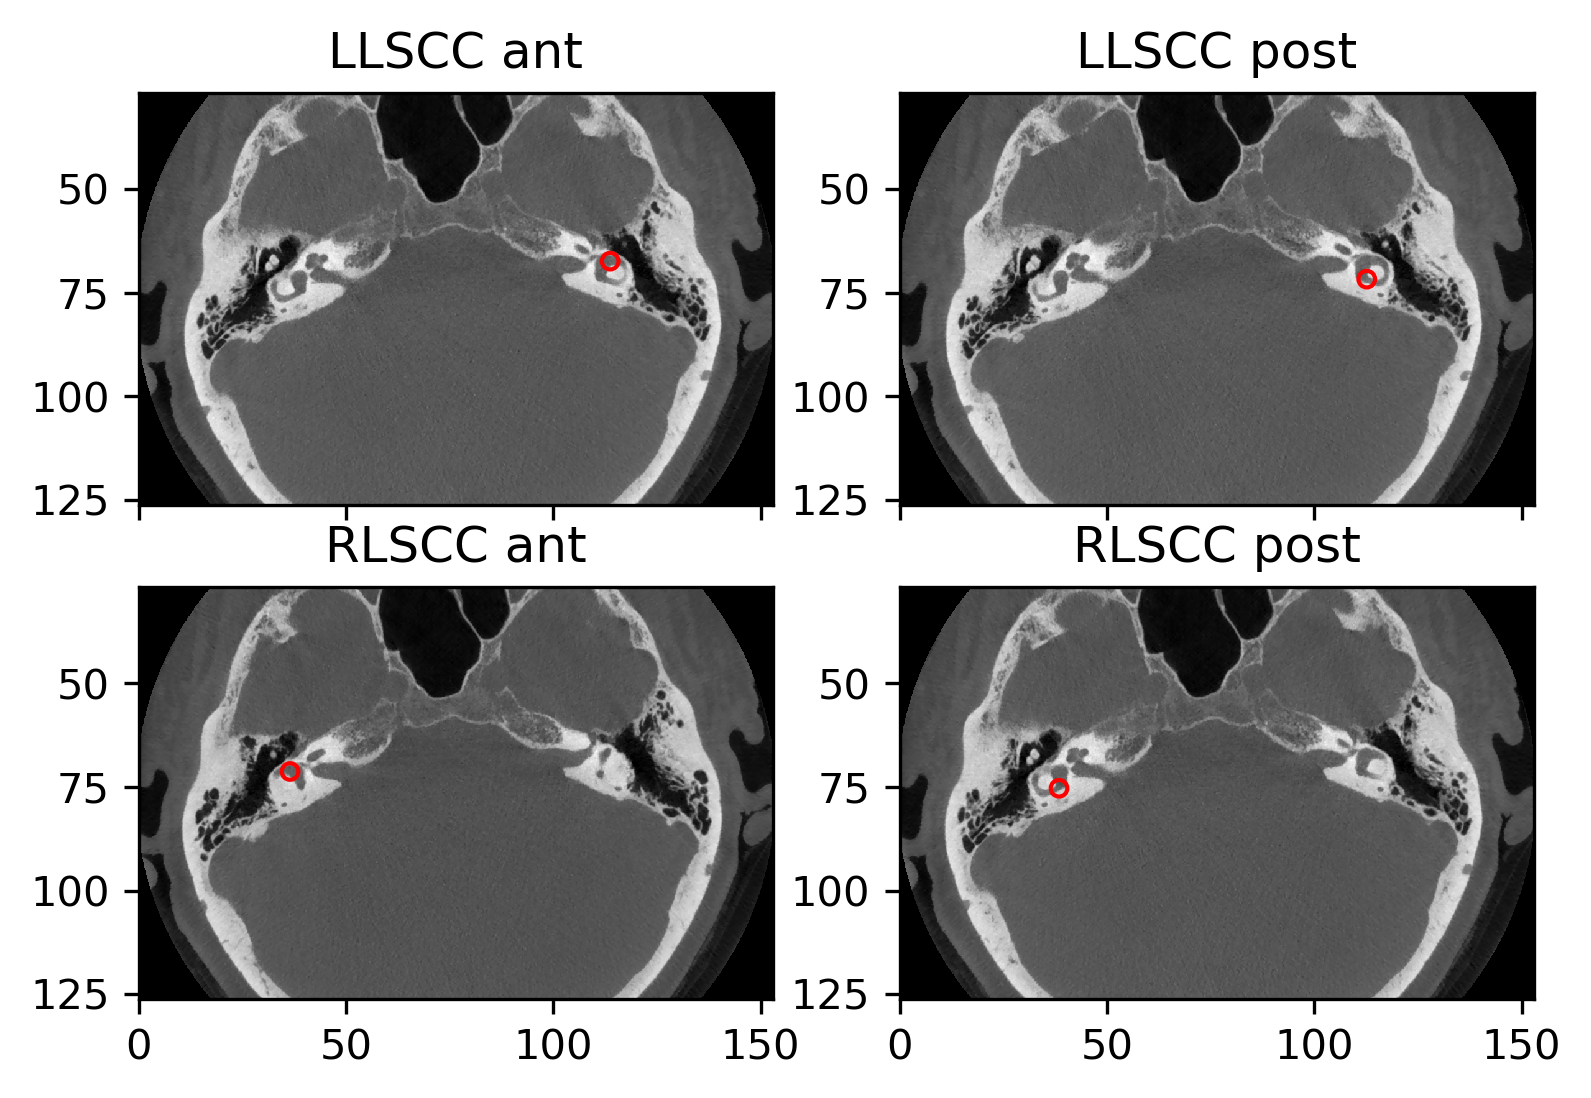

In [241]:
show_pts(ArrayDicom, numpy.copy(roi_CT_AH_Median.values), ConstPixelSpacing)

## Augment DICOM data: Rotate and Translate

In [29]:
import numpy as np
import math

def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians (Euler-Rodrigues formula).
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

In [158]:
m1 = rotation_matrix([1, 0, 0], np.pi/4)
print(m1)
m2 = rotation_matrix([1, 0, 0], -np.pi/4)
print(m2)

[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]
[[ 1.          0.          0.        ]
 [ 0.          0.70710678  0.70710678]
 [ 0.         -0.70710678  0.70710678]]


In [157]:
npos = np.dot(m1, [0.15,0.15,0.15])
print(npos)
opos = np.dot(m2, npos)
print(opos)

[ 1.50000000e-01 -1.38777878e-17  2.12132034e-01]
[0.14480013 0.02914142 0.21373746]


In [224]:
def rotate_3d_volume(volume, points, origin, axis, theta):
    """
    input:
        volume -- shape (row, column, slice), it stores the pixel value; RHS/LHS
        points -- some points in the original volume: [[row,column,slice],[r,c,s]...]
        rot_origin -- the origin point for the rotation process, should be in the same coordinate format as volume
        axis -- rotation axis
        theta -- rotation angle, counterclockwise on the specific axis
    output:
        rotated_volume -- shape (row, column, slice), consistent with the original volume coordinate format
        rotated_points -- the index of the points in the rotated volume
        mask -- The cover of the model in the rotated volume
    """
    # calculate rotate matrix and invert rotate matrix
    rot_matrix = rotation_matrix(axis, theta)
    inv_rot_matrix = rotation_matrix(axis, -theta)
    # get the min pixel value as the filler value
    fill_value = np.min(volume)
    # calculate the border of the rotated volume, the border is represented by 8 vertexes' positions
    original_vertexes = [ (row,column,slice) for row in [0, 1] for column in [0, 1] for slice in [0, 1] ]
    original_vertexes = np.multiply(original_vertexes, np.asarray(volume.shape)-1) # 0-indexing
    original_vertexes = original_vertexes - np.ones(original_vertexes.shape)*origin # positions in origin coordinate system
    rotated_vertexes = np.dot(rot_matrix, original_vertexes.T).T
    # calculate the new volume shape to store the rotated model from the same perspective
    min_border_point = np.floor(np.amin(rotated_vertexes, axis=0)).astype(int)
    max_border_point = np.ceil(np.amax(rotated_vertexes, axis=0)).astype(int)
    rotated_volume_shape = max_border_point - min_border_point + 1 # look at the model from the same perspective
    rotated_volume = np.ones(rotated_volume_shape) * fill_value
    # mask for the model
    mask = np.zeros(rotated_volume_shape)

    # calculate the positions of the given points in the rotated volume (not integer, the position's unit is the new volume's index)
    rotated_points = np.dot(rot_matrix, (points - np.ones(points.shape)*origin).T).T # position in the original volume index system
    round_rotated_points = np.round(rotated_points).astype(int) # round index position in the original volume index
    rotated_points = round_rotated_points - np.ones(round_rotated_points.shape)*min_border_point # relative positions in the new volume
    rotated_points = rotated_points.astype(int)
    # identify the mate pixel value for the rotated volume from the original volume
    for row in range(min_border_point[0], max_border_point[0]):
        for col in range(min_border_point[1], max_border_point[1]):
            #for slc in range(min_border_point[2], max_border_point[2]):
            for slc in round_rotated_points[:,2]:
                mate_position = np.dot(inv_rot_matrix, [row, col, slc])
                mate_index = mate_position + origin
                mate_index = np.round(mate_index).astype(int)
                # check limit
                if all(mate_index>=0) and mate_index[0]<volume.shape[0] and mate_index[1]<volume.shape[1] and mate_index[2]<volume.shape[2]:
                    # assign pixel value
                    rotated_volume_index = [row, col, slc] - min_border_point
                    rotated_volume[rotated_volume_index[0]][rotated_volume_index[1]][rotated_volume_index[2]] = \
                        volume[mate_index[0], mate_index[1], mate_index[2]]
                    mask[rotated_volume_index[0]][rotated_volume_index[1]][rotated_volume_index[2]] = 1

    return  rotated_volume, mask, rotated_points

In [228]:
def augment_3d_volume(volume, pts):
    # max rotation angle: 15 Degrees; change to Radian
    max_rot_angle = 15 * math.pi / 180
    # random rotation angle: -max to +max
    rand_angle = 2 * np.random.rand() * max_rot_angle - max_rot_angle
    # random rotation axis
    rot_axis = np.random.rand(3, )
    # The position matrix_(4*3) of LLSCC ant, LLSCC post, RLSCC an and RLSCC post: [x, y, z] --- [column, row, slice] is LHS
    # pts = np.copy(roi_CT_AH_Median.values)
    pts[:, [0, 1]] = pts[:, [1, 0]] # change LHS to RHS, make it consistent with ArrayDicom
    # Set the origin to the median point of these pts
    origin_pts = np.mean(pts, axis=0)
    #
    # the ArrayDicom is RHS
    #rotated_volume, mask, rotated_pts = rotate_3d_volume(ArrayDicom, pts, origin_pts, [1,0,0], np.pi)
    rotated_volume, mask, rotated_pts = rotate_3d_volume(volume, pts, origin_pts, rot_axis, rand_angle)

    # change back to RHS
    rotated_pts[:, [0,1]] = rotated_pts[:, [1,0]]

    print("rot_axis: ", rot_axis)
    print("rot_angle: ", np.round(rand_angle*180/math.pi))

    return rotated_volume, mask, rotated_pts

In [229]:
augmented_volume, mask, augmented_pts = augment_3d_volume(ArrayDicom, np.copy(roi_CT_AH_Median.values))

rot_axis:  [0.39605446 0.92317687 0.64847423]
rot_angle:  4.0


In [243]:
print(augmented_volume.shape)
print(augmented_pts)

(1071, 1062, 408)
[[776 468 251]
 [770 497 248]
 [262 512 246]
 [276 538 239]]


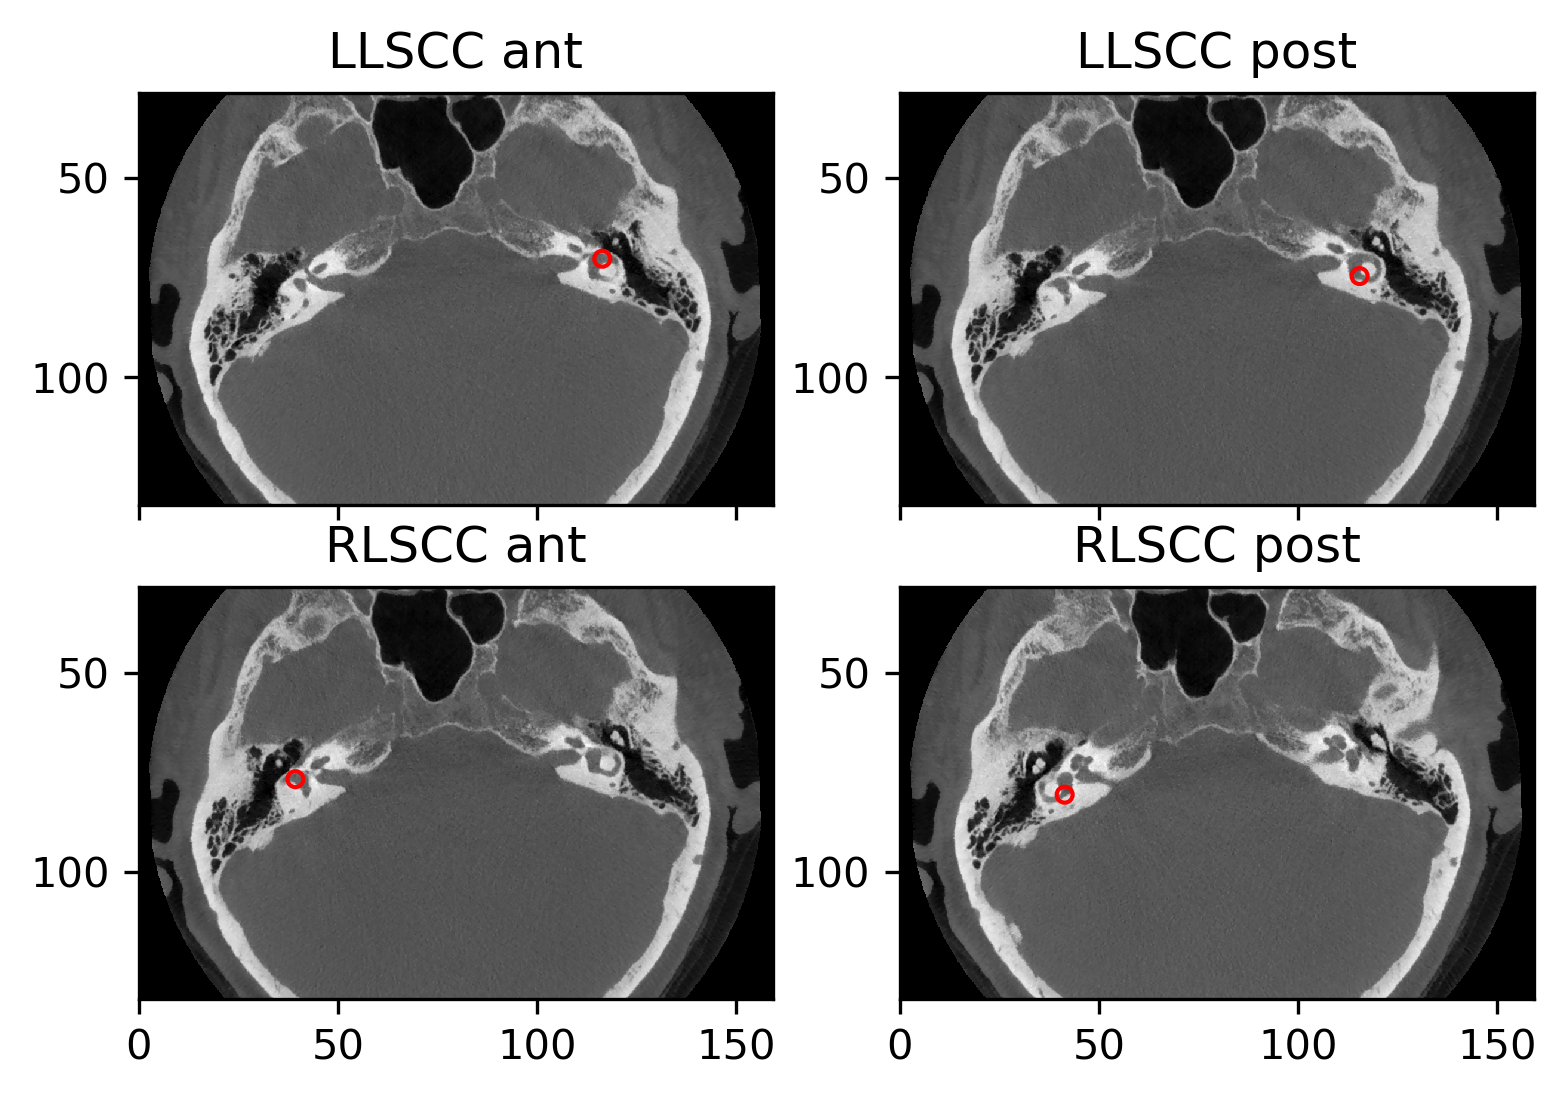

In [242]:
show_pts(augmented_volume, augmented_pts, [0.15, 0.15, 0.15])